### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [9]:
car = pd.read_csv('vehicle.csv')
car.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [10]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

This dataset has many missing values, hence dropping na rows. 

In [18]:
car[car['circularity'].isna()==True]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
105,108,NaN,103.0,202.0,64.0,10,220.0,30.0,25.0,168,NaN,711.0,214.0,73.0,11.0,NaN,188.0,199,car
118,85,NaN,NaN,128.0,56.0,8,150.0,46.0,19.0,144,168.0,324.0,173.0,82.0,9.0,14.0,180.0,184,bus
266,86,NaN,65.0,116.0,53.0,6,152.0,45.0,19.0,141,175.0,335.0,NaN,85.0,5.0,4.0,179.0,183,bus
396,108,NaN,106.0,177.0,51.0,5,256.0,26.0,28.0,170,285.0,966.0,261.0,87.0,11.0,2.0,182.0,181,bus


In [19]:
car.dropna(axis=0,inplace=True)

In [20]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

33 rows dropped due to missing values. 

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

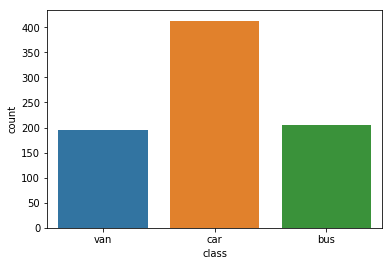

In [21]:
sns.countplot(car['class'])

### Check for any missing values in the data 

In [23]:
car.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

now there is no missing values anymore

### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

Before we are going to standardize, we will remove the target variable from the dataset. 

In [121]:
#StandardScaler uses Zscore behind the scene hence using the same.
sc= StandardScaler()

In [26]:
ScaledCar = sc.fit_transform(car.drop('class', axis=1))

C:\Users\sjain1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sjain1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [28]:
ScaledCar

array([[ 0.16323063,  0.52040788,  0.06066872, ...,  0.37128716,
        -0.3218087 ,  0.17183708],
       [-0.32287376, -0.61912319,  0.12406675, ...,  0.14710858,
         0.00340009,  0.44231829],
       [ 1.2569655 ,  0.84598818,  1.51882349, ..., -0.41333788,
        -0.1592043 ,  0.03659647],
       ...,
       [ 1.5000177 ,  1.49714879,  1.20183332, ..., -0.97378433,
        -0.3218087 ,  0.7127995 ],
       [-0.93050425, -1.43307395, -0.25632145, ...,  1.38009078,
         0.16600449, -0.09864413],
       [-1.05203035, -1.43307395, -1.01709784, ...,  0.59546574,
        -0.4844131 , -0.77484716]])

### K - Means Clustering

### Assign a dummy array called Cluster_error

In [29]:
cluster_errors = []

### 5. Calculate errorrs for each K

Iterating values of k from 1 to 10 fit K means model
Using inertia

In [31]:
cluster_range = range(1,11)
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, n_init=5)
  clusters.fit(ScaledCar)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df

,num_clusters,cluster_errors
0,1,14634.000000
1,2,8623.136976
2,3,7037.467395
3,4,5740.555574
4,5,5189.588855
5,6,4705.949959
6,7,4409.868737
7,8,4103.194235
8,9,3867.629387
9,10,3691.582484


### 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots Errors vs the no of clusters

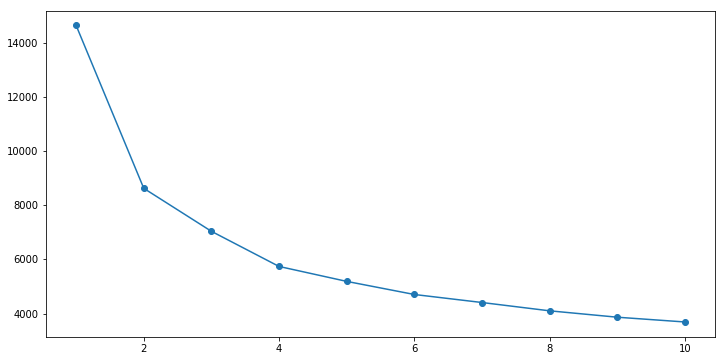

In [32]:
# Elbow plot to identify number of clusters

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

###### Using K++ means to see optimal K

In [34]:
cluster_errors = []
cluster_range = range(1,11)
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, init='k-means++')
  clusters.fit(ScaledCar)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df

,num_clusters,cluster_errors
0,1,14634.000000
1,2,8623.136976
2,3,7037.467395
3,4,5739.201327
4,5,5188.525265
5,6,4705.949959
6,7,4355.139334
7,8,4159.998354
8,9,3848.185382
9,10,3652.000236


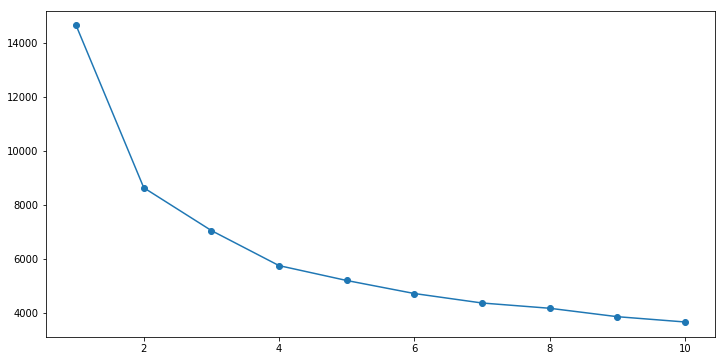

In [35]:
# Elbow plot to identify number of clusters

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### Find out the optimal value of K

As we see from above elbow curves and stats, optimal value of K looks like 4 because we see an elbow like structure here and also if we see stats, beyond k=4, it is not reducing error significantly. Hence using K as 4 now. 

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [49]:
cluster = KMeans( n_clusters = 4, init='k-means++' )
cluster.fit(ScaledCar)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [50]:
# Get the centroids.... using function cluster_centers_
centroids = cluster.cluster_centers_
centroids

array([[ 1.15442786e+00,  1.18428647e+00,  1.21198691e+00,
         9.73321772e-01,  9.49213388e-02,  2.18659142e-01,
         1.29796844e+00, -1.21424667e+00,  1.30184458e+00,
         1.09830595e+00,  1.20590258e+00,  1.30898668e+00,
         1.09121291e+00, -1.07878646e-01,  1.68326262e-01,
         2.67954844e-01,  4.67043879e-03,  1.90327006e-01],
       [-2.28397024e-01, -5.77112825e-01, -3.08062421e-01,
        -4.12415311e-02,  1.78444965e-01, -1.73698681e-01,
        -4.56879712e-01,  3.21990722e-01, -4.85591783e-01,
        -5.39969043e-01, -4.21528655e-01, -4.61480779e-01,
        -6.05499266e-01, -6.42849115e-01, -6.23412553e-02,
         1.29630066e-02,  8.22191910e-01,  7.05383081e-01],
       [-9.15758407e-01, -5.22402678e-01, -8.89505987e-01,
        -1.08772789e+00, -5.61970783e-01, -3.00015871e-01,
        -7.79778853e-01,  8.67364185e-01, -7.45939378e-01,
        -4.85536418e-01, -8.01746438e-01, -7.83836827e-01,
        -3.90574645e-01,  7.83159216e-01, -9.02385712e

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [42]:
car.drop('class', axis=1,inplace=True)

In [44]:
car.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'],
      dtype='object')

In [51]:
centroid_df = pd.DataFrame(centroids, columns = car.columns )

Hint: Use pd.Dataframe function 

In [52]:
centroid_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,1.154428,1.184286,1.211987,0.973322,0.094921,0.218659,1.297968,-1.214247,1.301845,1.098306,1.205903,1.308987,1.091213,-0.107879,0.168326,0.267955,0.004670,0.190327
1,-0.228397,-0.577113,-0.308062,-0.041242,0.178445,-0.173699,-0.456880,0.321991,-0.485592,-0.539969,-0.421529,-0.461481,-0.605499,-0.642849,-0.062341,0.012963,0.822192,0.705383
2,-0.915758,-0.522403,-0.889506,-1.087728,-0.561971,-0.300016,-0.779779,0.867364,-0.745939,-0.485536,-0.801746,-0.783837,-0.390575,0.783159,-0.090239,-0.296090,-1.047745,-1.103612
3,-0.733024,0.072735,-0.272171,2.947683,6.836652,8.696706,-0.535008,0.466248,-0.557406,0.283411,1.697528,-0.588068,0.212701,4.965638,-0.274839,-0.231193,-0.707994,-0.453651


### Use kmeans.labels_ function to print out the labels of the classes

In [48]:
cluster.labels_

array([1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 0, 0, 1, 1, 2,
       1, 0, 2, 2, 0, 1, 1, 1, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 2, 0, 0, 0,
       0, 1, 0, 1, 2, 1, 2, 1, 1, 0, 2, 0, 2, 0, 0, 0, 1, 0, 2, 1, 2, 2,
       1, 0, 1, 2, 1, 0, 0, 2, 1, 0, 1, 2, 1, 0, 1, 0, 2, 1, 2, 1, 0, 2,
       0, 0, 2, 0, 3, 1, 1, 0, 2, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 2, 2, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 0, 2, 3, 0, 1, 0, 1, 1, 2,
       0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 0, 1, 0, 2, 1, 1, 2, 2,
       1, 2, 0, 0, 2, 2, 1, 2, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 0, 2, 0, 0, 0, 1, 1, 2, 2, 1, 1, 1, 0, 2, 1, 1, 1,
       2, 0, 0, 2, 0, 1, 2, 0, 0, 0, 1, 2, 1, 2, 0, 0, 0, 0, 2, 1, 0, 1,
       2, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 0, 2, 0, 1, 1, 2, 1, 1, 2, 2, 0,
       1, 1, 1, 2, 0, 1, 1, 0, 0, 1, 1, 2, 1, 0, 0, 2, 1, 1, 0, 0, 2, 0,
       1, 2, 0, 1, 3, 1, 1, 2, 1, 2, 0, 1, 1, 2, 1, 1, 1, 0, 1, 2, 2, 2,
       2, 0, 1, 2, 0, 0, 0, 1, 0, 2, 2, 0, 2, 1, 0,

In [53]:
car['labels'] = cluster.labels_
car.groupby(["labels"]).count()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
labels,,,,,,,,,,,,,,,,,,
0,256,256,256,256,256,256,256,256,256,256,256,256,256,256,256,256,256,256
1,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310
2,239,239,239,239,239,239,239,239,239,239,239,239,239,239,239,239,239,239
3,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8


In [57]:
labels=car['labels'].unique()
labels

array([1, 0, 3, 2], dtype=int64)

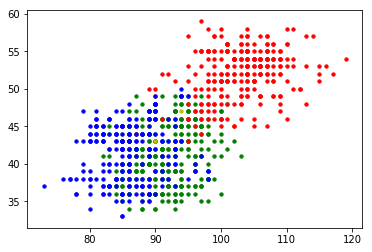

In [64]:
colors = ['r', 'g', 'b', 'y']
fig, ax = plt.subplots()
          
for i in labels:
        points = np.array(car.loc[car['labels'] == i])
        #c[i] = np.mean(points, axis=0)
        ax.scatter(points[:, 0], points[:, 1], s=11, c=colors[i])

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [65]:
np.random.seed(101)  # for repeatability of this dataset
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html

### 9. Combine all three arrays a,b,c into a dataframe

In [83]:
X = pd.concat([pd.DataFrame(a),pd.DataFrame(b),pd.DataFrame(c)],axis=0)
X.head()

,0,1
0,13.882785,4.438501
1,11.687256,1.250981
2,10.316397,1.449346
3,9.837412,-2.041974
4,8.691601,-4.289773


In [84]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 99
Data columns (total 2 columns):
0    250 non-null float64
1    250 non-null float64
dtypes: float64(2)
memory usage: 5.9 KB


### 10. Use scatter matrix to print all the 3 distributions

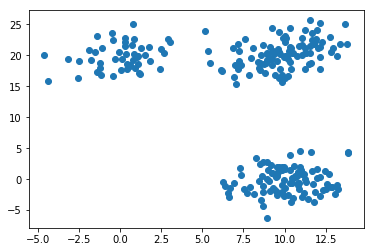

In [86]:
plt.scatter(X[0],X[1])

### 11. Find out the linkage matrix

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html

Use ward as linkage metric and distance as Eucledian

First scaling the data

In [87]:
from sklearn.preprocessing import normalize
data_scaled = normalize(X)
X = pd.DataFrame(data_scaled, columns=X.columns)
X.head()

,0,1
0,0.952504,0.304527
1,0.994320,0.106430
2,0.990275,0.139123
3,0.979129,-0.203240
4,0.896727,-0.442583


In [96]:
c_values=[]
link=[]
# Case 1: Ward Method
Z = linkage(X, 'ward')
c, coph_dists = cophenet(Z , pdist(X))
c_values.append(c)
link.append('ward')
# Case 2: Average Linkage
Z = linkage(X, 'average')
c, coph_dists = cophenet(Z , pdist(X))
c_values.append(c)
link.append('average')
# Case 3: Complete Linkage
Z = linkage(X, 'complete')
c, coph_dists = cophenet(Z , pdist(X))
c_values.append(c)
link.append('complete')
# Case 4: Single Linkage
Z = linkage(X, 'single')
c, coph_dists = cophenet(Z , pdist(X))
c_values.append(c)
link.append('single')
print(c_values)
print(link)
print(max(c_values))
#print('Max linkage score:', np.max(c_values) , 'Link:', link[np.indices(np.max(c_values))])

[0.936713101678553, 0.9403583746144194, 0.9292337088058699, 0.9262269209010052]
['ward', 'average', 'complete', 'single']
0.9403583746144194


maximum score is coming for average linkage. Though we have to ask for ward linkage hence will go with ward. 

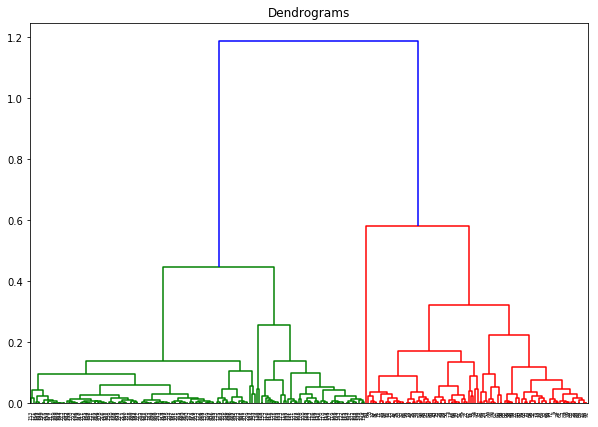

In [97]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(X, method='average'))

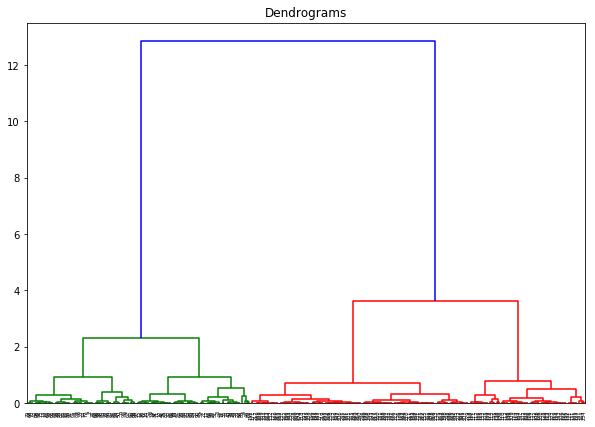

In [98]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(X, method='ward'))

ward is giving good distribution

### 12. Plot the dendrogram for the consolidated dataframe

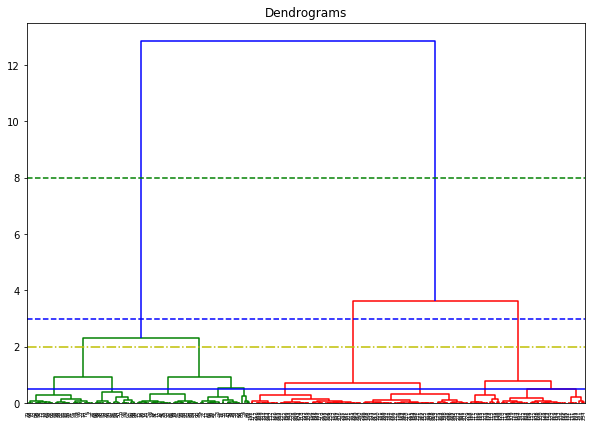

In [100]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(X, method='ward'))
plt.axhline(y=8, color='g', linestyle='--')
plt.axhline(y=3, color='b', linestyle='--')
plt.axhline(y=2, color='y', linestyle='-.')
plt.axhline(y=.5, color='b', linestyle='-')

### 13. Recreate the dendrogram for last 12 merged clusters 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

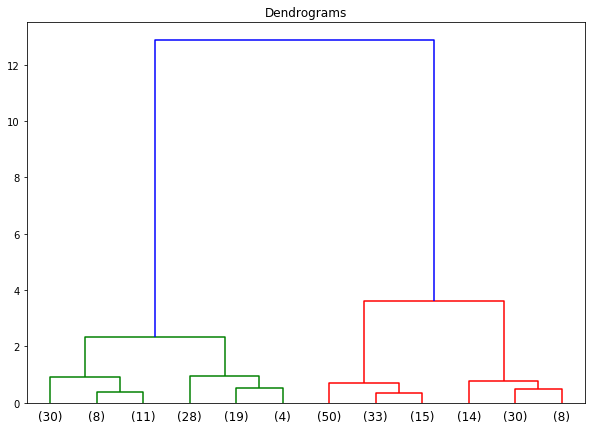

In [102]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(X, method='ward'),p=12,truncate_mode='lastp')

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.hierarchy.fcluster.html

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

### Use matplotlib to visually observe the clusters in 2D space 

Considering 4 clusters for this problem

In [106]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X)

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [107]:
X['labels'] = cluster.labels_
X.groupby(["labels"]).count()

,0,1
labels,,
0,51,51
1,49,49
2,98,98
3,52,52


In [115]:
X['predict']=cluster.fit_predict(X)
X.head()

,0,1,labels,predict
0,0.952504,0.304527,1,1
1,0.994320,0.106430,1,1
2,0.990275,0.139123,1,1
3,0.979129,-0.203240,0,0
4,0.896727,-0.442583,0,0


In [116]:
max(X['labels']-X['predict'])

0

.fit_predict and cluster.labels_ gives same results. We can label it both the ways

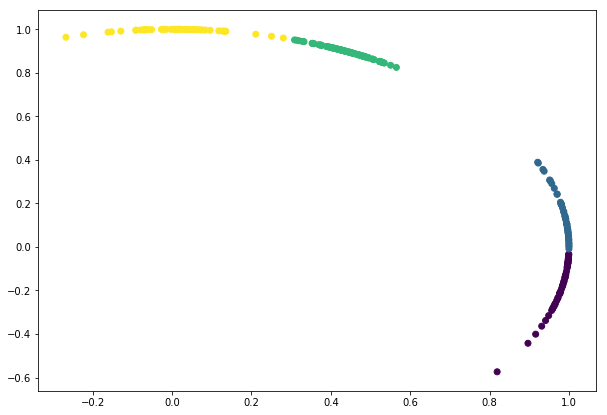

In [108]:
plt.figure(figsize=(10, 7))  
plt.scatter(X[0], X[1], c=cluster.labels_) 

Here we can clearly see that these 4 clusters are separated properly. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BF3118FBE0>,
      dtype=object)

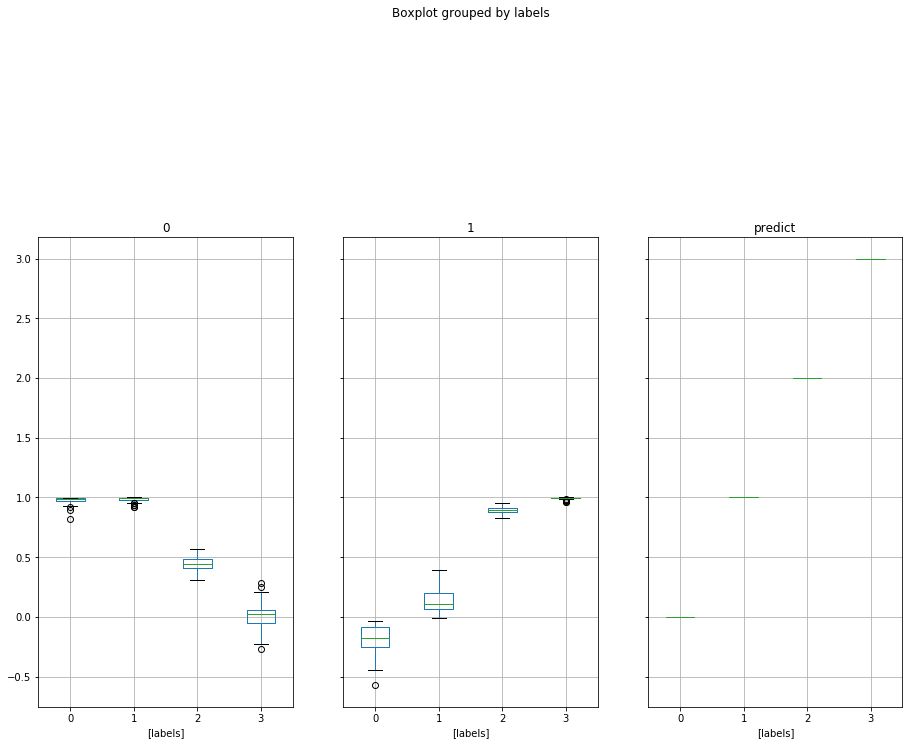

In [118]:
X.drop('predict',axis=1)
X.boxplot(by = 'labels',  layout=(4,3), figsize=(15, 40))

In [119]:
# We can see here as well that data is not overlapping/